In [16]:
#Note: Menggunakan Dataset dari Kaggle: https://www.kaggle.com/datasets/imaditia/indonesia-reading-interest-2020-2023
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur agar plot ditampilkan langsung di notebook
%matplotlib inline

In [17]:
# Mencoba memuat file, jika gagal akan ada pesan eror
try:
    df = pd.read_csv("TGM 2020-2023_eng.csv", sep=";")
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'TGM 2020-2023_eng.csv' tidak ditemukan.")
    # ... (membuat dataframe contoh)

# Daftar kolom yang akan dibersihkan
numeric_cols_with_commas = [
    "Reading Frequency per week", "Number of Readings per Quarter", "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week", "Daily Internet Duration (in minutes)", "Tingkat Kegemaran Membaca (Reading Interest)"
]

# Proses pembersihan untuk setiap kolom dalam daftar
for col in numeric_cols_with_commas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.')
        df[col] = pd.to_numeric(df[col], errors='coerce')
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

print("Pembersihan data selesai.")

Dataset berhasil dimuat.
Pembersihan data selesai.


In [18]:
# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(data, cols):
    data_clean = data.copy()
    print("\nMendeteksi outlier di setiap kolom numerik:")
    for c in cols:
        if c in data_clean.columns and pd.api.types.is_numeric_dtype(data_clean[c]):
            Q1 = data_clean[c].quantile(0.25)
            Q3 = data_clean[c].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_indices = data_clean[(data_clean[c] < lower_bound) | (data_clean[c] > upper_bound)].index
            print(f"- Kolom '{c}': {len(outlier_indices)} outlier terdeteksi.")
            data_clean = data_clean.drop(index=outlier_indices)
    return data_clean

# Menerapkan fungsi pada semua kolom numerik di DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print(f"\nUkuran data setelah penghapusan outlier: {df_no_outliers.shape}")


Mendeteksi outlier di setiap kolom numerik:
- Kolom 'Year': 0 outlier terdeteksi.
- Kolom 'Reading Frequency per week': 13 outlier terdeteksi.
- Kolom 'Number of Readings per Quarter': 0 outlier terdeteksi.
- Kolom 'Daily Reading Duration (in minutes)': 3 outlier terdeteksi.
- Kolom 'Internet Access Frequency per Week': 39 outlier terdeteksi.
- Kolom 'Daily Internet Duration (in minutes)': 7 outlier terdeteksi.
- Kolom 'Tingkat Kegemaran Membaca (Reading Interest)': 1 outlier terdeteksi.

Ukuran data setelah penghapusan outlier: (77, 9)


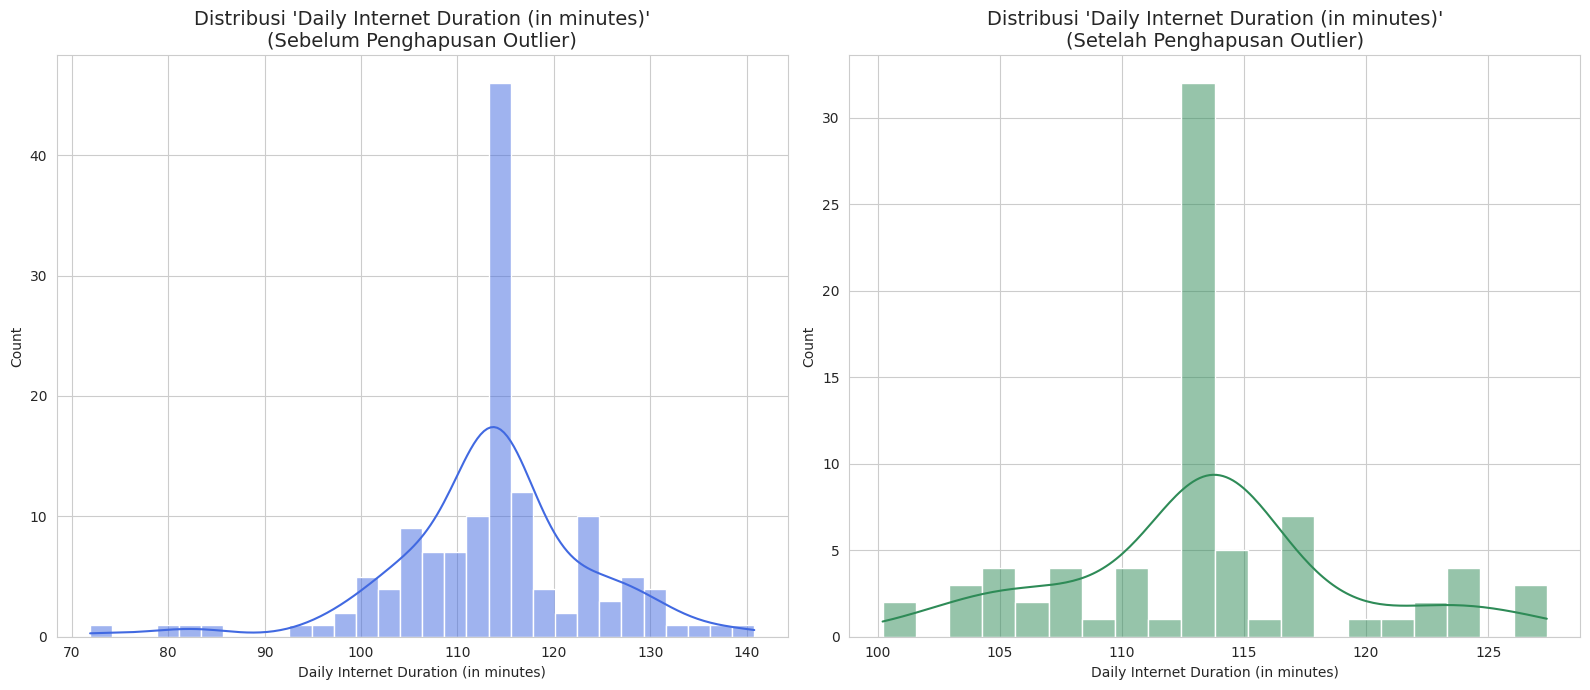

In [19]:
# Kolom yang akan divisualisasikan
col_to_visualize = "Daily Internet Duration (in minutes)"

# Membuat kanvas plot dan mengatur ukurannya
plt.figure(figsize=(16, 7))

# Plot 1: Sebelum penghapusan outlier
plt.subplot(1, 2, 1)
sns.histplot(df[col_to_visualize], bins=30, kde=True, color='royalblue')
plt.title(f"Distribusi '{col_to_visualize}'\n(Sebelum Penghapusan Outlier)", fontsize=14)

# Plot 2: Setelah penghapusan outlier
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers[col_to_visualize], bins=20, kde=True, color='seagreen')
plt.title(f"Distribusi '{col_to_visualize}'\n(Setelah Penghapusan Outlier)", fontsize=14)

# Merapikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [20]:
# Menyimpan DataFrame yang sudah bersih ke file CSV
df_no_outliers.to_csv("TGM_2020-2023_cleaned.csv", index=False)

print("\nDataset yang sudah bersih telah disimpan sebagai 'TGM_2020-2023_cleaned.csv'")


Dataset yang sudah bersih telah disimpan sebagai 'TGM_2020-2023_cleaned.csv'
